In [171]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [172]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [173]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [174]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [175]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [176]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [177]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [178]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [179]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

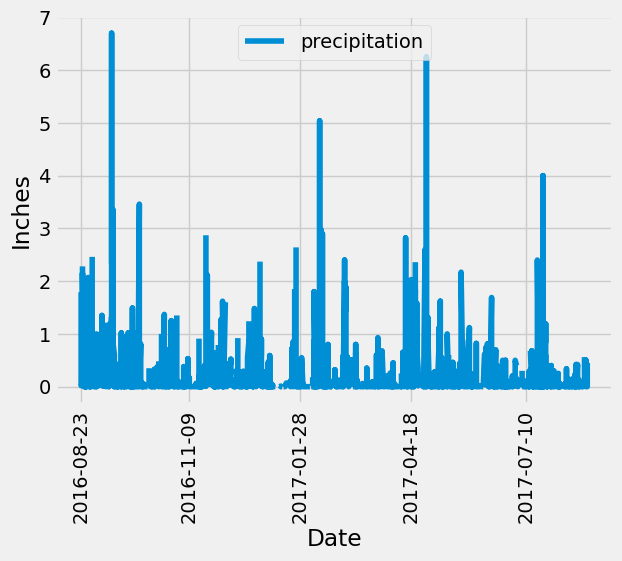

In [180]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
"""start_date = dt.datetime(2017,8,23) - dt.timedelta(days=365)"""
"2016-08-23"

# Perform a query to retrieve the data and precipitation scores
rain = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain, columns = ["Date", "Inches"])

# Sort the dataframe by date
rain_df = rain_df.sort_values("Date").reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(rain_df["Date"], rain_df["Inches"], label="precipitation")

plt.xticks(rain_df["Date"][::500], rotation="vertical")

plt.ylabel("Inches")
plt.xlabel("Date")
plt.legend(loc="upper center")
plt.show()

In [181]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [182]:
# Design a query to calculate the total number of stations in the dataset
station_number = session.query(station.station).count()
station_number

9

In [183]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [184]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = station_activity[0][0]

temperature_summary = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station_id).all()
temperature_summary

[(54.0, 85.0, 71.66378066378067)]

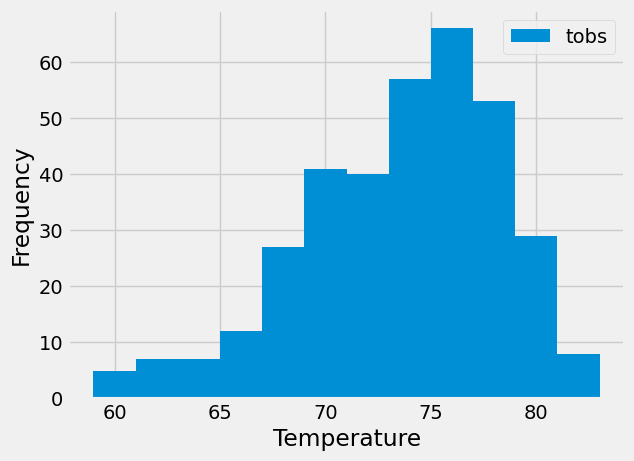

In [185]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(measurement.tobs).filter(measurement.date >= "2016-08-23").filter(measurement.station == most_active_station_id).all()

tobs_df = pd.DataFrame(tobs, columns=["Temperature"])

plt.hist(tobs_df, label="tobs", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="best")
plt.show()

# Close Session

In [187]:
# Close Session
session.close()